In [1]:
from IPython.display import display,HTML
def dhtml(str):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family=Orbitron&effect=3d';      
    </style><h1 class='font-effect-3d' 
    style='font-family:Orbitron; color:#ffee11; font-size:25px;'>
    %s</h1>"""%str))
def phtml(str):
    display(HTML("""<style>
    @import 'https://fonts.googleapis.com/css?family=Smokum&effect=3d-float';      
    </style><h1 class='font-effect-3d-float' 
    style='font-family:Smokum; color:#11ff11; font-size:25px;'>
    %s</h1>"""%str))

In [2]:
dhtml('Code Modules & Functions')

In [3]:
import warnings; warnings.filterwarnings('ignore')
import tensorflow as tf,pylab as pl
import pandas as pd,numpy as np,seaborn as sb
import tensorflow.keras.utils as tku
import tensorflow.image as timg
import tensorflow_datasets as tfds
from tensorflow.data import Dataset as tds
import sklearn.model_selection as sms
from IPython.core.magic import register_line_magic

In [6]:
def preprocess(item):
    image,label=item['image'],item['label']
    image=timg.convert_image_dtype(image,tf.float32)
    image=tf.reshape(image,(-1,))
    return {'image-pixels':image},label[...,tf.newaxis]
def train_input_fn(buffer_size,batch_size):
    datasets=tfds.load(name='mnist')
    mnist_train=datasets['train']
    ds=mnist_train.map(preprocess)
    ds=ds.shuffle(buffer_size)
    ds=ds.batch(batch_size)
    return ds.repeat()
def test_input_fn(batch_size):
    datasets=tfds.load(name='mnist')
    mnist_test=datasets['test']
    ds=mnist_test.map(preprocess)
    ds=ds.batch(batch_size)
    return ds

In [26]:
@register_line_magic
def display_predict(n):
    n=int(n)
    fig=pl.figure(figsize=(10,8))
    randch=np.random.choice(batch_size,size=n,
                            replace=False)
    for i,idx in enumerate(randch):
        ax=fig.add_subplot(3,n//3,i+1,
                           xticks=[],yticks=[])
        ax.imshow(bx_test[idx].reshape(img_size,img_size),
                  cmap='summer')
        pred_idx=py_test[idx]; true_idx=by_test[idx]
        ax.set_title("{} \n({})".format(pred_idx,true_idx),
                     color=("#11ff11" if pred_idx==true_idx 
                            else "#ffee11"))
    pl.show()

In [5]:
dhtml('Data Processing')

In [7]:
buffer_size=1000; batch_size=64
img_size=28; num_epochs=20
steps_per_epoch=np.ceil(60000/batch_size)
feature_column=tf.feature_column.numeric_column(
    key='image-pixels',shape=(img_size*img_size))

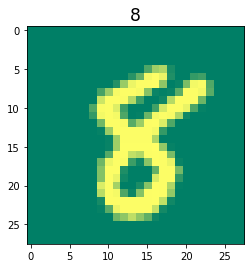

In [8]:
ds_test=test_input_fn(batch_size)
bx_test,by_test=[],[]
batch=next(iter(ds_test))
for j in range(batch_size):
    by_test.append(batch[1].numpy()[j][0])
    bx_test.append(batch[0]['image-pixels'].numpy()[j])
phtml('keys: </br>%s'%batch[0].keys())
n=np.random.randint(0,batch_size,1)[0]
img=bx_test[n].reshape(img_size,img_size)
pl.imshow(img,cmap='summer')
pl.title(by_test[n],fontdict={'fontsize':'xx-large'});

In [31]:
dhtml('DNN Classifiers')

In [10]:
dnn_clf=tf.estimator.DNNClassifier(
    feature_columns=[feature_column],
    hidden_units=[32,16],n_classes=10,
    model_dir='models/mnist-dnn/');

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'models/mnist-dnn/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'models/mnist-dnn/', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [11]:
dnn_clf.train(input_fn=lambda:train_input_fn(buffer_size,batch_size),
              steps=num_epochs*steps_per_epoch)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from models/mnist-dnn/model.ckpt-93800


INFO:tensorflow:Restoring parameters from models/mnist-dnn/model.ckpt-93800


Instructions for updating:
Use standard file utilities to get mtimes.


Instructions for updating:
Use standard file utilities to get mtimes.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 93800...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 93800...


INFO:tensorflow:Saving checkpoints for 93800 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Saving checkpoints for 93800 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 93800...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 93800...


INFO:tensorflow:loss = 0.21375597, step = 93800


INFO:tensorflow:loss = 0.21375597, step = 93800


INFO:tensorflow:global_step/sec: 69.1321


INFO:tensorflow:global_step/sec: 69.1321


INFO:tensorflow:loss = 0.23625514, step = 93900 (1.457 sec)


INFO:tensorflow:loss = 0.23625514, step = 93900 (1.457 sec)


INFO:tensorflow:global_step/sec: 66.0221


INFO:tensorflow:global_step/sec: 66.0221


INFO:tensorflow:loss = 0.27791244, step = 94000 (1.510 sec)


INFO:tensorflow:loss = 0.27791244, step = 94000 (1.510 sec)


INFO:tensorflow:global_step/sec: 66.9356


INFO:tensorflow:global_step/sec: 66.9356


INFO:tensorflow:loss = 0.20084038, step = 94100 (1.495 sec)


INFO:tensorflow:loss = 0.20084038, step = 94100 (1.495 sec)


INFO:tensorflow:global_step/sec: 63.7702


INFO:tensorflow:global_step/sec: 63.7702


INFO:tensorflow:loss = 0.14384991, step = 94200 (1.572 sec)


INFO:tensorflow:loss = 0.14384991, step = 94200 (1.572 sec)


INFO:tensorflow:global_step/sec: 64.0431


INFO:tensorflow:global_step/sec: 64.0431


INFO:tensorflow:loss = 0.28026566, step = 94300 (1.558 sec)


INFO:tensorflow:loss = 0.28026566, step = 94300 (1.558 sec)


INFO:tensorflow:global_step/sec: 65.5627


INFO:tensorflow:global_step/sec: 65.5627


INFO:tensorflow:loss = 0.21130337, step = 94400 (1.526 sec)


INFO:tensorflow:loss = 0.21130337, step = 94400 (1.526 sec)


INFO:tensorflow:global_step/sec: 65.3392


INFO:tensorflow:global_step/sec: 65.3392


INFO:tensorflow:loss = 0.39343005, step = 94500 (1.532 sec)


INFO:tensorflow:loss = 0.39343005, step = 94500 (1.532 sec)


INFO:tensorflow:global_step/sec: 64.7566


INFO:tensorflow:global_step/sec: 64.7566


INFO:tensorflow:loss = 0.47870234, step = 94600 (1.548 sec)


INFO:tensorflow:loss = 0.47870234, step = 94600 (1.548 sec)


INFO:tensorflow:global_step/sec: 64.4675


INFO:tensorflow:global_step/sec: 64.4675


INFO:tensorflow:loss = 0.1378479, step = 94700 (1.551 sec)


INFO:tensorflow:loss = 0.1378479, step = 94700 (1.551 sec)


INFO:tensorflow:global_step/sec: 77.9391


INFO:tensorflow:global_step/sec: 77.9391


INFO:tensorflow:loss = 0.15665609, step = 94800 (1.299 sec)


INFO:tensorflow:loss = 0.15665609, step = 94800 (1.299 sec)


INFO:tensorflow:global_step/sec: 85.0137


INFO:tensorflow:global_step/sec: 85.0137


INFO:tensorflow:loss = 0.2783579, step = 94900 (1.172 sec)


INFO:tensorflow:loss = 0.2783579, step = 94900 (1.172 sec)


INFO:tensorflow:global_step/sec: 79.5982


INFO:tensorflow:global_step/sec: 79.5982


INFO:tensorflow:loss = 0.3781315, step = 95000 (1.263 sec)


INFO:tensorflow:loss = 0.3781315, step = 95000 (1.263 sec)


INFO:tensorflow:global_step/sec: 81.1992


INFO:tensorflow:global_step/sec: 81.1992


INFO:tensorflow:loss = 0.23748752, step = 95100 (1.227 sec)


INFO:tensorflow:loss = 0.23748752, step = 95100 (1.227 sec)


INFO:tensorflow:global_step/sec: 84.5629


INFO:tensorflow:global_step/sec: 84.5629


INFO:tensorflow:loss = 0.24230559, step = 95200 (1.179 sec)


INFO:tensorflow:loss = 0.24230559, step = 95200 (1.179 sec)


INFO:tensorflow:global_step/sec: 68.5472


INFO:tensorflow:global_step/sec: 68.5472


INFO:tensorflow:loss = 0.24296317, step = 95300 (1.445 sec)


INFO:tensorflow:loss = 0.24296317, step = 95300 (1.445 sec)


INFO:tensorflow:global_step/sec: 63.3943


INFO:tensorflow:global_step/sec: 63.3943


INFO:tensorflow:loss = 0.4291702, step = 95400 (1.582 sec)


INFO:tensorflow:loss = 0.4291702, step = 95400 (1.582 sec)


INFO:tensorflow:global_step/sec: 63.2549


INFO:tensorflow:global_step/sec: 63.2549


INFO:tensorflow:loss = 0.17080492, step = 95500 (1.578 sec)


INFO:tensorflow:loss = 0.17080492, step = 95500 (1.578 sec)


INFO:tensorflow:global_step/sec: 63.3834


INFO:tensorflow:global_step/sec: 63.3834


INFO:tensorflow:loss = 0.32843757, step = 95600 (1.577 sec)


INFO:tensorflow:loss = 0.32843757, step = 95600 (1.577 sec)


INFO:tensorflow:global_step/sec: 71.3381


INFO:tensorflow:global_step/sec: 71.3381


INFO:tensorflow:loss = 0.21745689, step = 95700 (1.409 sec)


INFO:tensorflow:loss = 0.21745689, step = 95700 (1.409 sec)


INFO:tensorflow:global_step/sec: 78.1513


INFO:tensorflow:global_step/sec: 78.1513


INFO:tensorflow:loss = 0.13853665, step = 95800 (1.280 sec)


INFO:tensorflow:loss = 0.13853665, step = 95800 (1.280 sec)


INFO:tensorflow:global_step/sec: 81.7538


INFO:tensorflow:global_step/sec: 81.7538


INFO:tensorflow:loss = 0.35746443, step = 95900 (1.232 sec)


INFO:tensorflow:loss = 0.35746443, step = 95900 (1.232 sec)


INFO:tensorflow:global_step/sec: 81.966


INFO:tensorflow:global_step/sec: 81.966


INFO:tensorflow:loss = 0.13073933, step = 96000 (1.210 sec)


INFO:tensorflow:loss = 0.13073933, step = 96000 (1.210 sec)


INFO:tensorflow:global_step/sec: 79.6829


INFO:tensorflow:global_step/sec: 79.6829


INFO:tensorflow:loss = 0.44801515, step = 96100 (1.267 sec)


INFO:tensorflow:loss = 0.44801515, step = 96100 (1.267 sec)


INFO:tensorflow:global_step/sec: 81.7684


INFO:tensorflow:global_step/sec: 81.7684


INFO:tensorflow:loss = 0.35192457, step = 96200 (1.218 sec)


INFO:tensorflow:loss = 0.35192457, step = 96200 (1.218 sec)


INFO:tensorflow:global_step/sec: 82.8318


INFO:tensorflow:global_step/sec: 82.8318


INFO:tensorflow:loss = 0.30186027, step = 96300 (1.205 sec)


INFO:tensorflow:loss = 0.30186027, step = 96300 (1.205 sec)


INFO:tensorflow:global_step/sec: 83.7099


INFO:tensorflow:global_step/sec: 83.7099


INFO:tensorflow:loss = 0.23872656, step = 96400 (1.216 sec)


INFO:tensorflow:loss = 0.23872656, step = 96400 (1.216 sec)


INFO:tensorflow:global_step/sec: 81.5245


INFO:tensorflow:global_step/sec: 81.5245


INFO:tensorflow:loss = 0.20814571, step = 96500 (1.211 sec)


INFO:tensorflow:loss = 0.20814571, step = 96500 (1.211 sec)


INFO:tensorflow:global_step/sec: 83.5583


INFO:tensorflow:global_step/sec: 83.5583


INFO:tensorflow:loss = 0.17514403, step = 96600 (1.175 sec)


INFO:tensorflow:loss = 0.17514403, step = 96600 (1.175 sec)


INFO:tensorflow:global_step/sec: 76.3749


INFO:tensorflow:global_step/sec: 76.3749


INFO:tensorflow:loss = 0.37489033, step = 96700 (1.313 sec)


INFO:tensorflow:loss = 0.37489033, step = 96700 (1.313 sec)


INFO:tensorflow:global_step/sec: 75.266


INFO:tensorflow:global_step/sec: 75.266


INFO:tensorflow:loss = 0.31407773, step = 96800 (1.333 sec)


INFO:tensorflow:loss = 0.31407773, step = 96800 (1.333 sec)


INFO:tensorflow:global_step/sec: 61.9361


INFO:tensorflow:global_step/sec: 61.9361


INFO:tensorflow:loss = 0.32563886, step = 96900 (1.610 sec)


INFO:tensorflow:loss = 0.32563886, step = 96900 (1.610 sec)


INFO:tensorflow:global_step/sec: 61.9197


INFO:tensorflow:global_step/sec: 61.9197


INFO:tensorflow:loss = 0.33010358, step = 97000 (1.621 sec)


INFO:tensorflow:loss = 0.33010358, step = 97000 (1.621 sec)


INFO:tensorflow:global_step/sec: 64.2802


INFO:tensorflow:global_step/sec: 64.2802


INFO:tensorflow:loss = 0.41662467, step = 97100 (1.549 sec)


INFO:tensorflow:loss = 0.41662467, step = 97100 (1.549 sec)


INFO:tensorflow:global_step/sec: 62.8882


INFO:tensorflow:global_step/sec: 62.8882


INFO:tensorflow:loss = 0.31223944, step = 97200 (1.587 sec)


INFO:tensorflow:loss = 0.31223944, step = 97200 (1.587 sec)


INFO:tensorflow:global_step/sec: 64.957


INFO:tensorflow:global_step/sec: 64.957


INFO:tensorflow:loss = 0.20331806, step = 97300 (1.549 sec)


INFO:tensorflow:loss = 0.20331806, step = 97300 (1.549 sec)


INFO:tensorflow:global_step/sec: 60.7033


INFO:tensorflow:global_step/sec: 60.7033


INFO:tensorflow:loss = 0.31300688, step = 97400 (1.640 sec)


INFO:tensorflow:loss = 0.31300688, step = 97400 (1.640 sec)


INFO:tensorflow:global_step/sec: 64.221


INFO:tensorflow:global_step/sec: 64.221


INFO:tensorflow:loss = 0.18750025, step = 97500 (1.558 sec)


INFO:tensorflow:loss = 0.18750025, step = 97500 (1.558 sec)


INFO:tensorflow:global_step/sec: 72.9194


INFO:tensorflow:global_step/sec: 72.9194


INFO:tensorflow:loss = 0.40078932, step = 97600 (1.385 sec)


INFO:tensorflow:loss = 0.40078932, step = 97600 (1.385 sec)


INFO:tensorflow:global_step/sec: 80.2656


INFO:tensorflow:global_step/sec: 80.2656


INFO:tensorflow:loss = 0.24112612, step = 97700 (1.250 sec)


INFO:tensorflow:loss = 0.24112612, step = 97700 (1.250 sec)


INFO:tensorflow:global_step/sec: 79.8456


INFO:tensorflow:global_step/sec: 79.8456


INFO:tensorflow:loss = 0.3847797, step = 97800 (1.264 sec)


INFO:tensorflow:loss = 0.3847797, step = 97800 (1.264 sec)


INFO:tensorflow:global_step/sec: 84.0919


INFO:tensorflow:global_step/sec: 84.0919


INFO:tensorflow:loss = 0.1620912, step = 97900 (1.176 sec)


INFO:tensorflow:loss = 0.1620912, step = 97900 (1.176 sec)


INFO:tensorflow:global_step/sec: 77.7671


INFO:tensorflow:global_step/sec: 77.7671


INFO:tensorflow:loss = 0.20474416, step = 98000 (1.292 sec)


INFO:tensorflow:loss = 0.20474416, step = 98000 (1.292 sec)


INFO:tensorflow:global_step/sec: 77.8287


INFO:tensorflow:global_step/sec: 77.8287


INFO:tensorflow:loss = 0.37300682, step = 98100 (1.274 sec)


INFO:tensorflow:loss = 0.37300682, step = 98100 (1.274 sec)


INFO:tensorflow:global_step/sec: 77.0584


INFO:tensorflow:global_step/sec: 77.0584


INFO:tensorflow:loss = 0.26084247, step = 98200 (1.290 sec)


INFO:tensorflow:loss = 0.26084247, step = 98200 (1.290 sec)


INFO:tensorflow:global_step/sec: 84.3506


INFO:tensorflow:global_step/sec: 84.3506


INFO:tensorflow:loss = 0.1681546, step = 98300 (1.198 sec)


INFO:tensorflow:loss = 0.1681546, step = 98300 (1.198 sec)


INFO:tensorflow:global_step/sec: 81.5132


INFO:tensorflow:global_step/sec: 81.5132


INFO:tensorflow:loss = 0.19152893, step = 98400 (1.222 sec)


INFO:tensorflow:loss = 0.19152893, step = 98400 (1.222 sec)


INFO:tensorflow:global_step/sec: 81.9618


INFO:tensorflow:global_step/sec: 81.9618


INFO:tensorflow:loss = 0.14009283, step = 98500 (1.215 sec)


INFO:tensorflow:loss = 0.14009283, step = 98500 (1.215 sec)


INFO:tensorflow:global_step/sec: 80.4367


INFO:tensorflow:global_step/sec: 80.4367


INFO:tensorflow:loss = 0.12389918, step = 98600 (1.235 sec)


INFO:tensorflow:loss = 0.12389918, step = 98600 (1.235 sec)


INFO:tensorflow:global_step/sec: 77.4948


INFO:tensorflow:global_step/sec: 77.4948


INFO:tensorflow:loss = 0.47033003, step = 98700 (1.314 sec)


INFO:tensorflow:loss = 0.47033003, step = 98700 (1.314 sec)


INFO:tensorflow:global_step/sec: 79.7857


INFO:tensorflow:global_step/sec: 79.7857


INFO:tensorflow:loss = 0.26797664, step = 98800 (1.237 sec)


INFO:tensorflow:loss = 0.26797664, step = 98800 (1.237 sec)


INFO:tensorflow:global_step/sec: 82.3987


INFO:tensorflow:global_step/sec: 82.3987


INFO:tensorflow:loss = 0.1342721, step = 98900 (1.217 sec)


INFO:tensorflow:loss = 0.1342721, step = 98900 (1.217 sec)


INFO:tensorflow:global_step/sec: 79.647


INFO:tensorflow:global_step/sec: 79.647


INFO:tensorflow:loss = 0.24040098, step = 99000 (1.248 sec)


INFO:tensorflow:loss = 0.24040098, step = 99000 (1.248 sec)


INFO:tensorflow:global_step/sec: 80.2573


INFO:tensorflow:global_step/sec: 80.2573


INFO:tensorflow:loss = 0.18074831, step = 99100 (1.277 sec)


INFO:tensorflow:loss = 0.18074831, step = 99100 (1.277 sec)


INFO:tensorflow:global_step/sec: 84.4726


INFO:tensorflow:global_step/sec: 84.4726


INFO:tensorflow:loss = 0.3262295, step = 99200 (1.179 sec)


INFO:tensorflow:loss = 0.3262295, step = 99200 (1.179 sec)


INFO:tensorflow:global_step/sec: 83.6475


INFO:tensorflow:global_step/sec: 83.6475


INFO:tensorflow:loss = 0.25648797, step = 99300 (1.173 sec)


INFO:tensorflow:loss = 0.25648797, step = 99300 (1.173 sec)


INFO:tensorflow:global_step/sec: 81.4064


INFO:tensorflow:global_step/sec: 81.4064


INFO:tensorflow:loss = 0.17843477, step = 99400 (1.241 sec)


INFO:tensorflow:loss = 0.17843477, step = 99400 (1.241 sec)


INFO:tensorflow:global_step/sec: 82.9587


INFO:tensorflow:global_step/sec: 82.9587


INFO:tensorflow:loss = 0.24031122, step = 99500 (1.204 sec)


INFO:tensorflow:loss = 0.24031122, step = 99500 (1.204 sec)


INFO:tensorflow:global_step/sec: 83.1971


INFO:tensorflow:global_step/sec: 83.1971


INFO:tensorflow:loss = 0.12864849, step = 99600 (1.201 sec)


INFO:tensorflow:loss = 0.12864849, step = 99600 (1.201 sec)


INFO:tensorflow:global_step/sec: 82.4714


INFO:tensorflow:global_step/sec: 82.4714


INFO:tensorflow:loss = 0.24508107, step = 99700 (1.216 sec)


INFO:tensorflow:loss = 0.24508107, step = 99700 (1.216 sec)


INFO:tensorflow:global_step/sec: 84.7062


INFO:tensorflow:global_step/sec: 84.7062


INFO:tensorflow:loss = 0.34485683, step = 99800 (1.173 sec)


INFO:tensorflow:loss = 0.34485683, step = 99800 (1.173 sec)


INFO:tensorflow:global_step/sec: 79.2685


INFO:tensorflow:global_step/sec: 79.2685


INFO:tensorflow:loss = 0.38701418, step = 99900 (1.250 sec)


INFO:tensorflow:loss = 0.38701418, step = 99900 (1.250 sec)


INFO:tensorflow:global_step/sec: 62.4704


INFO:tensorflow:global_step/sec: 62.4704


INFO:tensorflow:loss = 0.27750257, step = 100000 (1.604 sec)


INFO:tensorflow:loss = 0.27750257, step = 100000 (1.604 sec)


INFO:tensorflow:global_step/sec: 63.8579


INFO:tensorflow:global_step/sec: 63.8579


INFO:tensorflow:loss = 0.21993506, step = 100100 (1.562 sec)


INFO:tensorflow:loss = 0.21993506, step = 100100 (1.562 sec)


INFO:tensorflow:global_step/sec: 65.1102


INFO:tensorflow:global_step/sec: 65.1102


INFO:tensorflow:loss = 0.30314273, step = 100200 (1.539 sec)


INFO:tensorflow:loss = 0.30314273, step = 100200 (1.539 sec)


INFO:tensorflow:global_step/sec: 64.5206


INFO:tensorflow:global_step/sec: 64.5206


INFO:tensorflow:loss = 0.27675956, step = 100300 (1.550 sec)


INFO:tensorflow:loss = 0.27675956, step = 100300 (1.550 sec)


INFO:tensorflow:global_step/sec: 71.7678


INFO:tensorflow:global_step/sec: 71.7678


INFO:tensorflow:loss = 0.3471602, step = 100400 (1.393 sec)


INFO:tensorflow:loss = 0.3471602, step = 100400 (1.393 sec)


INFO:tensorflow:global_step/sec: 78.3265


INFO:tensorflow:global_step/sec: 78.3265


INFO:tensorflow:loss = 0.36289632, step = 100500 (1.282 sec)


INFO:tensorflow:loss = 0.36289632, step = 100500 (1.282 sec)


INFO:tensorflow:global_step/sec: 83.5557


INFO:tensorflow:global_step/sec: 83.5557


INFO:tensorflow:loss = 0.2873416, step = 100600 (1.192 sec)


INFO:tensorflow:loss = 0.2873416, step = 100600 (1.192 sec)


INFO:tensorflow:global_step/sec: 77.6446


INFO:tensorflow:global_step/sec: 77.6446


INFO:tensorflow:loss = 0.29700932, step = 100700 (1.305 sec)


INFO:tensorflow:loss = 0.29700932, step = 100700 (1.305 sec)


INFO:tensorflow:global_step/sec: 81.5485


INFO:tensorflow:global_step/sec: 81.5485


INFO:tensorflow:loss = 0.22874123, step = 100800 (1.224 sec)


INFO:tensorflow:loss = 0.22874123, step = 100800 (1.224 sec)


INFO:tensorflow:global_step/sec: 84.4206


INFO:tensorflow:global_step/sec: 84.4206


INFO:tensorflow:loss = 0.28683096, step = 100900 (1.189 sec)


INFO:tensorflow:loss = 0.28683096, step = 100900 (1.189 sec)


INFO:tensorflow:global_step/sec: 80.8942


INFO:tensorflow:global_step/sec: 80.8942


INFO:tensorflow:loss = 0.32600385, step = 101000 (1.250 sec)


INFO:tensorflow:loss = 0.32600385, step = 101000 (1.250 sec)


INFO:tensorflow:global_step/sec: 80.5025


INFO:tensorflow:global_step/sec: 80.5025


INFO:tensorflow:loss = 0.10019794, step = 101100 (1.217 sec)


INFO:tensorflow:loss = 0.10019794, step = 101100 (1.217 sec)


INFO:tensorflow:global_step/sec: 84.4168


INFO:tensorflow:global_step/sec: 84.4168


INFO:tensorflow:loss = 0.09792143, step = 101200 (1.195 sec)


INFO:tensorflow:loss = 0.09792143, step = 101200 (1.195 sec)


INFO:tensorflow:global_step/sec: 91.8755


INFO:tensorflow:global_step/sec: 91.8755


INFO:tensorflow:loss = 0.22366537, step = 101300 (1.073 sec)


INFO:tensorflow:loss = 0.22366537, step = 101300 (1.073 sec)


INFO:tensorflow:global_step/sec: 72.1743


INFO:tensorflow:global_step/sec: 72.1743


INFO:tensorflow:loss = 0.2422502, step = 101400 (1.393 sec)


INFO:tensorflow:loss = 0.2422502, step = 101400 (1.393 sec)


INFO:tensorflow:global_step/sec: 80.9192


INFO:tensorflow:global_step/sec: 80.9192


INFO:tensorflow:loss = 0.27082795, step = 101500 (1.227 sec)


INFO:tensorflow:loss = 0.27082795, step = 101500 (1.227 sec)


INFO:tensorflow:global_step/sec: 82.2032


INFO:tensorflow:global_step/sec: 82.2032


INFO:tensorflow:loss = 0.27235597, step = 101600 (1.214 sec)


INFO:tensorflow:loss = 0.27235597, step = 101600 (1.214 sec)


INFO:tensorflow:global_step/sec: 80.2121


INFO:tensorflow:global_step/sec: 80.2121


INFO:tensorflow:loss = 0.28555125, step = 101700 (1.261 sec)


INFO:tensorflow:loss = 0.28555125, step = 101700 (1.261 sec)


INFO:tensorflow:global_step/sec: 80.7492


INFO:tensorflow:global_step/sec: 80.7492


INFO:tensorflow:loss = 0.17864412, step = 101800 (1.240 sec)


INFO:tensorflow:loss = 0.17864412, step = 101800 (1.240 sec)


INFO:tensorflow:global_step/sec: 82.7015


INFO:tensorflow:global_step/sec: 82.7015


INFO:tensorflow:loss = 0.46555302, step = 101900 (1.210 sec)


INFO:tensorflow:loss = 0.46555302, step = 101900 (1.210 sec)


INFO:tensorflow:global_step/sec: 80.7012


INFO:tensorflow:global_step/sec: 80.7012


INFO:tensorflow:loss = 0.43454134, step = 102000 (1.242 sec)


INFO:tensorflow:loss = 0.43454134, step = 102000 (1.242 sec)


INFO:tensorflow:global_step/sec: 81.1035


INFO:tensorflow:global_step/sec: 81.1035


INFO:tensorflow:loss = 0.46091557, step = 102100 (1.225 sec)


INFO:tensorflow:loss = 0.46091557, step = 102100 (1.225 sec)


INFO:tensorflow:global_step/sec: 83.8935


INFO:tensorflow:global_step/sec: 83.8935


INFO:tensorflow:loss = 0.23207721, step = 102200 (1.187 sec)


INFO:tensorflow:loss = 0.23207721, step = 102200 (1.187 sec)


INFO:tensorflow:global_step/sec: 81.7483


INFO:tensorflow:global_step/sec: 81.7483


INFO:tensorflow:loss = 0.2024908, step = 102300 (1.234 sec)


INFO:tensorflow:loss = 0.2024908, step = 102300 (1.234 sec)


INFO:tensorflow:global_step/sec: 79.7453


INFO:tensorflow:global_step/sec: 79.7453


INFO:tensorflow:loss = 0.2638421, step = 102400 (1.250 sec)


INFO:tensorflow:loss = 0.2638421, step = 102400 (1.250 sec)


INFO:tensorflow:global_step/sec: 82.0986


INFO:tensorflow:global_step/sec: 82.0986


INFO:tensorflow:loss = 0.31425202, step = 102500 (1.218 sec)


INFO:tensorflow:loss = 0.31425202, step = 102500 (1.218 sec)


INFO:tensorflow:global_step/sec: 82.3207


INFO:tensorflow:global_step/sec: 82.3207


INFO:tensorflow:loss = 0.27350163, step = 102600 (1.215 sec)


INFO:tensorflow:loss = 0.27350163, step = 102600 (1.215 sec)


INFO:tensorflow:global_step/sec: 83.2344


INFO:tensorflow:global_step/sec: 83.2344


INFO:tensorflow:loss = 0.29077804, step = 102700 (1.192 sec)


INFO:tensorflow:loss = 0.29077804, step = 102700 (1.192 sec)


INFO:tensorflow:global_step/sec: 83.4359


INFO:tensorflow:global_step/sec: 83.4359


INFO:tensorflow:loss = 0.30125707, step = 102800 (1.196 sec)


INFO:tensorflow:loss = 0.30125707, step = 102800 (1.196 sec)


INFO:tensorflow:global_step/sec: 80.2081


INFO:tensorflow:global_step/sec: 80.2081


INFO:tensorflow:loss = 0.44216126, step = 102900 (1.243 sec)


INFO:tensorflow:loss = 0.44216126, step = 102900 (1.243 sec)


INFO:tensorflow:global_step/sec: 83.6668


INFO:tensorflow:global_step/sec: 83.6668


INFO:tensorflow:loss = 0.22896335, step = 103000 (1.212 sec)


INFO:tensorflow:loss = 0.22896335, step = 103000 (1.212 sec)


INFO:tensorflow:global_step/sec: 79.7056


INFO:tensorflow:global_step/sec: 79.7056


INFO:tensorflow:loss = 0.3360998, step = 103100 (1.258 sec)


INFO:tensorflow:loss = 0.3360998, step = 103100 (1.258 sec)


INFO:tensorflow:global_step/sec: 83.1156


INFO:tensorflow:global_step/sec: 83.1156


INFO:tensorflow:loss = 0.20031442, step = 103200 (1.185 sec)


INFO:tensorflow:loss = 0.20031442, step = 103200 (1.185 sec)


INFO:tensorflow:global_step/sec: 79.5059


INFO:tensorflow:global_step/sec: 79.5059


INFO:tensorflow:loss = 0.25679404, step = 103300 (1.270 sec)


INFO:tensorflow:loss = 0.25679404, step = 103300 (1.270 sec)


INFO:tensorflow:global_step/sec: 81.9351


INFO:tensorflow:global_step/sec: 81.9351


INFO:tensorflow:loss = 0.56219614, step = 103400 (1.224 sec)


INFO:tensorflow:loss = 0.56219614, step = 103400 (1.224 sec)


INFO:tensorflow:global_step/sec: 79.852


INFO:tensorflow:global_step/sec: 79.852


INFO:tensorflow:loss = 0.28669423, step = 103500 (1.248 sec)


INFO:tensorflow:loss = 0.28669423, step = 103500 (1.248 sec)


INFO:tensorflow:global_step/sec: 83.0948


INFO:tensorflow:global_step/sec: 83.0948


INFO:tensorflow:loss = 0.35282344, step = 103600 (1.206 sec)


INFO:tensorflow:loss = 0.35282344, step = 103600 (1.206 sec)


INFO:tensorflow:global_step/sec: 85.1372


INFO:tensorflow:global_step/sec: 85.1372


INFO:tensorflow:loss = 0.15345748, step = 103700 (1.174 sec)


INFO:tensorflow:loss = 0.15345748, step = 103700 (1.174 sec)


INFO:tensorflow:global_step/sec: 80.5793


INFO:tensorflow:global_step/sec: 80.5793


INFO:tensorflow:loss = 0.25800827, step = 103800 (1.241 sec)


INFO:tensorflow:loss = 0.25800827, step = 103800 (1.241 sec)


INFO:tensorflow:global_step/sec: 85.2057


INFO:tensorflow:global_step/sec: 85.2057


INFO:tensorflow:loss = 0.35447615, step = 103900 (1.182 sec)


INFO:tensorflow:loss = 0.35447615, step = 103900 (1.182 sec)


INFO:tensorflow:global_step/sec: 81.5682


INFO:tensorflow:global_step/sec: 81.5682


INFO:tensorflow:loss = 0.18738136, step = 104000 (1.228 sec)


INFO:tensorflow:loss = 0.18738136, step = 104000 (1.228 sec)


INFO:tensorflow:global_step/sec: 84.4775


INFO:tensorflow:global_step/sec: 84.4775


INFO:tensorflow:loss = 0.3691793, step = 104100 (1.158 sec)


INFO:tensorflow:loss = 0.3691793, step = 104100 (1.158 sec)


INFO:tensorflow:global_step/sec: 79.6399


INFO:tensorflow:global_step/sec: 79.6399


INFO:tensorflow:loss = 0.31915975, step = 104200 (1.268 sec)


INFO:tensorflow:loss = 0.31915975, step = 104200 (1.268 sec)


INFO:tensorflow:global_step/sec: 82.4918


INFO:tensorflow:global_step/sec: 82.4918


INFO:tensorflow:loss = 0.5128876, step = 104300 (1.223 sec)


INFO:tensorflow:loss = 0.5128876, step = 104300 (1.223 sec)


INFO:tensorflow:global_step/sec: 82.1321


INFO:tensorflow:global_step/sec: 82.1321


INFO:tensorflow:loss = 0.09683497, step = 104400 (1.194 sec)


INFO:tensorflow:loss = 0.09683497, step = 104400 (1.194 sec)


INFO:tensorflow:global_step/sec: 81.1657


INFO:tensorflow:global_step/sec: 81.1657


INFO:tensorflow:loss = 0.35439914, step = 104500 (1.238 sec)


INFO:tensorflow:loss = 0.35439914, step = 104500 (1.238 sec)


INFO:tensorflow:global_step/sec: 83.6562


INFO:tensorflow:global_step/sec: 83.6562


INFO:tensorflow:loss = 0.13335282, step = 104600 (1.197 sec)


INFO:tensorflow:loss = 0.13335282, step = 104600 (1.197 sec)


INFO:tensorflow:global_step/sec: 77.8888


INFO:tensorflow:global_step/sec: 77.8888


INFO:tensorflow:loss = 0.14881566, step = 104700 (1.279 sec)


INFO:tensorflow:loss = 0.14881566, step = 104700 (1.279 sec)


INFO:tensorflow:global_step/sec: 63.2565


INFO:tensorflow:global_step/sec: 63.2565


INFO:tensorflow:loss = 0.24732725, step = 104800 (1.578 sec)


INFO:tensorflow:loss = 0.24732725, step = 104800 (1.578 sec)


INFO:tensorflow:global_step/sec: 63.9218


INFO:tensorflow:global_step/sec: 63.9218


INFO:tensorflow:loss = 0.280955, step = 104900 (1.563 sec)


INFO:tensorflow:loss = 0.280955, step = 104900 (1.563 sec)


INFO:tensorflow:global_step/sec: 63.8169


INFO:tensorflow:global_step/sec: 63.8169


INFO:tensorflow:loss = 0.23557597, step = 105000 (1.588 sec)


INFO:tensorflow:loss = 0.23557597, step = 105000 (1.588 sec)


INFO:tensorflow:global_step/sec: 75.5259


INFO:tensorflow:global_step/sec: 75.5259


INFO:tensorflow:loss = 0.29408967, step = 105100 (1.327 sec)


INFO:tensorflow:loss = 0.29408967, step = 105100 (1.327 sec)


INFO:tensorflow:global_step/sec: 83.4894


INFO:tensorflow:global_step/sec: 83.4894


INFO:tensorflow:loss = 0.10474032, step = 105200 (1.191 sec)


INFO:tensorflow:loss = 0.10474032, step = 105200 (1.191 sec)


INFO:tensorflow:global_step/sec: 81.1008


INFO:tensorflow:global_step/sec: 81.1008


INFO:tensorflow:loss = 0.25653908, step = 105300 (1.226 sec)


INFO:tensorflow:loss = 0.25653908, step = 105300 (1.226 sec)


INFO:tensorflow:global_step/sec: 79.3944


INFO:tensorflow:global_step/sec: 79.3944


INFO:tensorflow:loss = 0.38865906, step = 105400 (1.264 sec)


INFO:tensorflow:loss = 0.38865906, step = 105400 (1.264 sec)


INFO:tensorflow:global_step/sec: 84.8193


INFO:tensorflow:global_step/sec: 84.8193


INFO:tensorflow:loss = 0.19994965, step = 105500 (1.173 sec)


INFO:tensorflow:loss = 0.19994965, step = 105500 (1.173 sec)


INFO:tensorflow:global_step/sec: 80.2167


INFO:tensorflow:global_step/sec: 80.2167


INFO:tensorflow:loss = 0.2516531, step = 105600 (1.263 sec)


INFO:tensorflow:loss = 0.2516531, step = 105600 (1.263 sec)


INFO:tensorflow:global_step/sec: 81.6229


INFO:tensorflow:global_step/sec: 81.6229


INFO:tensorflow:loss = 0.18623911, step = 105700 (1.211 sec)


INFO:tensorflow:loss = 0.18623911, step = 105700 (1.211 sec)


INFO:tensorflow:global_step/sec: 77.4663


INFO:tensorflow:global_step/sec: 77.4663


INFO:tensorflow:loss = 0.24102797, step = 105800 (1.298 sec)


INFO:tensorflow:loss = 0.24102797, step = 105800 (1.298 sec)


INFO:tensorflow:global_step/sec: 81.2008


INFO:tensorflow:global_step/sec: 81.2008


INFO:tensorflow:loss = 0.30765864, step = 105900 (1.217 sec)


INFO:tensorflow:loss = 0.30765864, step = 105900 (1.217 sec)


INFO:tensorflow:global_step/sec: 82.1912


INFO:tensorflow:global_step/sec: 82.1912


INFO:tensorflow:loss = 0.2502293, step = 106000 (1.219 sec)


INFO:tensorflow:loss = 0.2502293, step = 106000 (1.219 sec)


INFO:tensorflow:global_step/sec: 81.6362


INFO:tensorflow:global_step/sec: 81.6362


INFO:tensorflow:loss = 0.27357233, step = 106100 (1.229 sec)


INFO:tensorflow:loss = 0.27357233, step = 106100 (1.229 sec)


INFO:tensorflow:global_step/sec: 81.0403


INFO:tensorflow:global_step/sec: 81.0403


INFO:tensorflow:loss = 0.23231027, step = 106200 (1.247 sec)


INFO:tensorflow:loss = 0.23231027, step = 106200 (1.247 sec)


INFO:tensorflow:global_step/sec: 81.1738


INFO:tensorflow:global_step/sec: 81.1738


INFO:tensorflow:loss = 0.29351625, step = 106300 (1.211 sec)


INFO:tensorflow:loss = 0.29351625, step = 106300 (1.211 sec)


INFO:tensorflow:global_step/sec: 82.2436


INFO:tensorflow:global_step/sec: 82.2436


INFO:tensorflow:loss = 0.19026557, step = 106400 (1.217 sec)


INFO:tensorflow:loss = 0.19026557, step = 106400 (1.217 sec)


INFO:tensorflow:global_step/sec: 84.0725


INFO:tensorflow:global_step/sec: 84.0725


INFO:tensorflow:loss = 0.2106519, step = 106500 (1.189 sec)


INFO:tensorflow:loss = 0.2106519, step = 106500 (1.189 sec)


INFO:tensorflow:global_step/sec: 81.1077


INFO:tensorflow:global_step/sec: 81.1077


INFO:tensorflow:loss = 0.21553281, step = 106600 (1.250 sec)


INFO:tensorflow:loss = 0.21553281, step = 106600 (1.250 sec)


INFO:tensorflow:global_step/sec: 83.3317


INFO:tensorflow:global_step/sec: 83.3317


INFO:tensorflow:loss = 0.20802414, step = 106700 (1.212 sec)


INFO:tensorflow:loss = 0.20802414, step = 106700 (1.212 sec)


INFO:tensorflow:global_step/sec: 80.2493


INFO:tensorflow:global_step/sec: 80.2493


INFO:tensorflow:loss = 0.18842518, step = 106800 (1.238 sec)


INFO:tensorflow:loss = 0.18842518, step = 106800 (1.238 sec)


INFO:tensorflow:global_step/sec: 80.912


INFO:tensorflow:global_step/sec: 80.912


INFO:tensorflow:loss = 0.29818353, step = 106900 (1.233 sec)


INFO:tensorflow:loss = 0.29818353, step = 106900 (1.233 sec)


INFO:tensorflow:global_step/sec: 81.3456


INFO:tensorflow:global_step/sec: 81.3456


INFO:tensorflow:loss = 0.2701101, step = 107000 (1.221 sec)


INFO:tensorflow:loss = 0.2701101, step = 107000 (1.221 sec)


INFO:tensorflow:global_step/sec: 80.2152


INFO:tensorflow:global_step/sec: 80.2152


INFO:tensorflow:loss = 0.34238523, step = 107100 (1.239 sec)


INFO:tensorflow:loss = 0.34238523, step = 107100 (1.239 sec)


INFO:tensorflow:global_step/sec: 81.6807


INFO:tensorflow:global_step/sec: 81.6807


INFO:tensorflow:loss = 0.22183093, step = 107200 (1.245 sec)


INFO:tensorflow:loss = 0.22183093, step = 107200 (1.245 sec)


INFO:tensorflow:global_step/sec: 85.0474


INFO:tensorflow:global_step/sec: 85.0474


INFO:tensorflow:loss = 0.27568048, step = 107300 (1.172 sec)


INFO:tensorflow:loss = 0.27568048, step = 107300 (1.172 sec)


INFO:tensorflow:global_step/sec: 80.8361


INFO:tensorflow:global_step/sec: 80.8361


INFO:tensorflow:loss = 0.32128555, step = 107400 (1.232 sec)


INFO:tensorflow:loss = 0.32128555, step = 107400 (1.232 sec)


INFO:tensorflow:global_step/sec: 84.808


INFO:tensorflow:global_step/sec: 84.808


INFO:tensorflow:loss = 0.39087483, step = 107500 (1.164 sec)


INFO:tensorflow:loss = 0.39087483, step = 107500 (1.164 sec)


INFO:tensorflow:global_step/sec: 82.264


INFO:tensorflow:global_step/sec: 82.264


INFO:tensorflow:loss = 0.19410971, step = 107600 (1.227 sec)


INFO:tensorflow:loss = 0.19410971, step = 107600 (1.227 sec)


INFO:tensorflow:global_step/sec: 84.6067


INFO:tensorflow:global_step/sec: 84.6067


INFO:tensorflow:loss = 0.32847422, step = 107700 (1.176 sec)


INFO:tensorflow:loss = 0.32847422, step = 107700 (1.176 sec)


INFO:tensorflow:global_step/sec: 82.9522


INFO:tensorflow:global_step/sec: 82.9522


INFO:tensorflow:loss = 0.2881371, step = 107800 (1.207 sec)


INFO:tensorflow:loss = 0.2881371, step = 107800 (1.207 sec)


INFO:tensorflow:global_step/sec: 87.3803


INFO:tensorflow:global_step/sec: 87.3803


INFO:tensorflow:loss = 0.3418375, step = 107900 (1.140 sec)


INFO:tensorflow:loss = 0.3418375, step = 107900 (1.140 sec)


INFO:tensorflow:global_step/sec: 82.1213


INFO:tensorflow:global_step/sec: 82.1213


INFO:tensorflow:loss = 0.24749628, step = 108000 (1.225 sec)


INFO:tensorflow:loss = 0.24749628, step = 108000 (1.225 sec)


INFO:tensorflow:global_step/sec: 83.7435


INFO:tensorflow:global_step/sec: 83.7435


INFO:tensorflow:loss = 0.19058657, step = 108100 (1.200 sec)


INFO:tensorflow:loss = 0.19058657, step = 108100 (1.200 sec)


INFO:tensorflow:global_step/sec: 84.3492


INFO:tensorflow:global_step/sec: 84.3492


INFO:tensorflow:loss = 0.1313603, step = 108200 (1.176 sec)


INFO:tensorflow:loss = 0.1313603, step = 108200 (1.176 sec)


INFO:tensorflow:global_step/sec: 82.0752


INFO:tensorflow:global_step/sec: 82.0752


INFO:tensorflow:loss = 0.35729194, step = 108300 (1.231 sec)


INFO:tensorflow:loss = 0.35729194, step = 108300 (1.231 sec)


INFO:tensorflow:global_step/sec: 82.0622


INFO:tensorflow:global_step/sec: 82.0622


INFO:tensorflow:loss = 0.23143438, step = 108400 (1.219 sec)


INFO:tensorflow:loss = 0.23143438, step = 108400 (1.219 sec)


INFO:tensorflow:global_step/sec: 82.2568


INFO:tensorflow:global_step/sec: 82.2568


INFO:tensorflow:loss = 0.30859092, step = 108500 (1.209 sec)


INFO:tensorflow:loss = 0.30859092, step = 108500 (1.209 sec)


INFO:tensorflow:global_step/sec: 82.0681


INFO:tensorflow:global_step/sec: 82.0681


INFO:tensorflow:loss = 0.3862648, step = 108600 (1.219 sec)


INFO:tensorflow:loss = 0.3862648, step = 108600 (1.219 sec)


INFO:tensorflow:global_step/sec: 82.8039


INFO:tensorflow:global_step/sec: 82.8039


INFO:tensorflow:loss = 0.31818765, step = 108700 (1.206 sec)


INFO:tensorflow:loss = 0.31818765, step = 108700 (1.206 sec)


INFO:tensorflow:global_step/sec: 90.2744


INFO:tensorflow:global_step/sec: 90.2744


INFO:tensorflow:loss = 0.1667965, step = 108800 (1.097 sec)


INFO:tensorflow:loss = 0.1667965, step = 108800 (1.097 sec)


INFO:tensorflow:global_step/sec: 76.285


INFO:tensorflow:global_step/sec: 76.285


INFO:tensorflow:loss = 0.27603483, step = 108900 (1.324 sec)


INFO:tensorflow:loss = 0.27603483, step = 108900 (1.324 sec)


INFO:tensorflow:global_step/sec: 81.685


INFO:tensorflow:global_step/sec: 81.685


INFO:tensorflow:loss = 0.17727232, step = 109000 (1.214 sec)


INFO:tensorflow:loss = 0.17727232, step = 109000 (1.214 sec)


INFO:tensorflow:global_step/sec: 82.8686


INFO:tensorflow:global_step/sec: 82.8686


INFO:tensorflow:loss = 0.17983022, step = 109100 (1.219 sec)


INFO:tensorflow:loss = 0.17983022, step = 109100 (1.219 sec)


INFO:tensorflow:global_step/sec: 81.7301


INFO:tensorflow:global_step/sec: 81.7301


INFO:tensorflow:loss = 0.4221855, step = 109200 (1.238 sec)


INFO:tensorflow:loss = 0.4221855, step = 109200 (1.238 sec)


INFO:tensorflow:global_step/sec: 82.4305


INFO:tensorflow:global_step/sec: 82.4305


INFO:tensorflow:loss = 0.4905545, step = 109300 (1.184 sec)


INFO:tensorflow:loss = 0.4905545, step = 109300 (1.184 sec)


INFO:tensorflow:global_step/sec: 78.883


INFO:tensorflow:global_step/sec: 78.883


INFO:tensorflow:loss = 0.23475751, step = 109400 (1.281 sec)


INFO:tensorflow:loss = 0.23475751, step = 109400 (1.281 sec)


INFO:tensorflow:global_step/sec: 79.916


INFO:tensorflow:global_step/sec: 79.916


INFO:tensorflow:loss = 0.38314456, step = 109500 (1.238 sec)


INFO:tensorflow:loss = 0.38314456, step = 109500 (1.238 sec)


INFO:tensorflow:global_step/sec: 63.9015


INFO:tensorflow:global_step/sec: 63.9015


INFO:tensorflow:loss = 0.22751991, step = 109600 (1.563 sec)


INFO:tensorflow:loss = 0.22751991, step = 109600 (1.563 sec)


INFO:tensorflow:global_step/sec: 63.8197


INFO:tensorflow:global_step/sec: 63.8197


INFO:tensorflow:loss = 0.1976738, step = 109700 (1.568 sec)


INFO:tensorflow:loss = 0.1976738, step = 109700 (1.568 sec)


INFO:tensorflow:global_step/sec: 75.8078


INFO:tensorflow:global_step/sec: 75.8078


INFO:tensorflow:loss = 0.23621318, step = 109800 (1.322 sec)


INFO:tensorflow:loss = 0.23621318, step = 109800 (1.322 sec)


INFO:tensorflow:global_step/sec: 82.3893


INFO:tensorflow:global_step/sec: 82.3893


INFO:tensorflow:loss = 0.28317338, step = 109900 (1.220 sec)


INFO:tensorflow:loss = 0.28317338, step = 109900 (1.220 sec)


INFO:tensorflow:global_step/sec: 84.3993


INFO:tensorflow:global_step/sec: 84.3993


INFO:tensorflow:loss = 0.2008155, step = 110000 (1.193 sec)


INFO:tensorflow:loss = 0.2008155, step = 110000 (1.193 sec)


INFO:tensorflow:global_step/sec: 82.9417


INFO:tensorflow:global_step/sec: 82.9417


INFO:tensorflow:loss = 0.44708124, step = 110100 (1.201 sec)


INFO:tensorflow:loss = 0.44708124, step = 110100 (1.201 sec)


INFO:tensorflow:global_step/sec: 80.2297


INFO:tensorflow:global_step/sec: 80.2297


INFO:tensorflow:loss = 0.26103827, step = 110200 (1.251 sec)


INFO:tensorflow:loss = 0.26103827, step = 110200 (1.251 sec)


INFO:tensorflow:global_step/sec: 84.9765


INFO:tensorflow:global_step/sec: 84.9765


INFO:tensorflow:loss = 0.58674717, step = 110300 (1.168 sec)


INFO:tensorflow:loss = 0.58674717, step = 110300 (1.168 sec)


INFO:tensorflow:global_step/sec: 82.7698


INFO:tensorflow:global_step/sec: 82.7698


INFO:tensorflow:loss = 0.23066774, step = 110400 (1.215 sec)


INFO:tensorflow:loss = 0.23066774, step = 110400 (1.215 sec)


INFO:tensorflow:global_step/sec: 81.1206


INFO:tensorflow:global_step/sec: 81.1206


INFO:tensorflow:loss = 0.26602143, step = 110500 (1.225 sec)


INFO:tensorflow:loss = 0.26602143, step = 110500 (1.225 sec)


INFO:tensorflow:global_step/sec: 79.2724


INFO:tensorflow:global_step/sec: 79.2724


INFO:tensorflow:loss = 0.26915956, step = 110600 (1.255 sec)


INFO:tensorflow:loss = 0.26915956, step = 110600 (1.255 sec)


INFO:tensorflow:global_step/sec: 81.9341


INFO:tensorflow:global_step/sec: 81.9341


INFO:tensorflow:loss = 0.24423851, step = 110700 (1.225 sec)


INFO:tensorflow:loss = 0.24423851, step = 110700 (1.225 sec)


INFO:tensorflow:global_step/sec: 82.2935


INFO:tensorflow:global_step/sec: 82.2935


INFO:tensorflow:loss = 0.25457916, step = 110800 (1.223 sec)


INFO:tensorflow:loss = 0.25457916, step = 110800 (1.223 sec)


INFO:tensorflow:global_step/sec: 82.2298


INFO:tensorflow:global_step/sec: 82.2298


INFO:tensorflow:loss = 0.32203394, step = 110900 (1.207 sec)


INFO:tensorflow:loss = 0.32203394, step = 110900 (1.207 sec)


INFO:tensorflow:global_step/sec: 82.868


INFO:tensorflow:global_step/sec: 82.868


INFO:tensorflow:loss = 0.31632057, step = 111000 (1.222 sec)


INFO:tensorflow:loss = 0.31632057, step = 111000 (1.222 sec)


INFO:tensorflow:global_step/sec: 83.5528


INFO:tensorflow:global_step/sec: 83.5528


INFO:tensorflow:loss = 0.38535115, step = 111100 (1.181 sec)


INFO:tensorflow:loss = 0.38535115, step = 111100 (1.181 sec)


INFO:tensorflow:global_step/sec: 81.4175


INFO:tensorflow:global_step/sec: 81.4175


INFO:tensorflow:loss = 0.30043042, step = 111200 (1.245 sec)


INFO:tensorflow:loss = 0.30043042, step = 111200 (1.245 sec)


INFO:tensorflow:global_step/sec: 84.6931


INFO:tensorflow:global_step/sec: 84.6931


INFO:tensorflow:loss = 0.28748158, step = 111300 (1.166 sec)


INFO:tensorflow:loss = 0.28748158, step = 111300 (1.166 sec)


INFO:tensorflow:global_step/sec: 83.5739


INFO:tensorflow:global_step/sec: 83.5739


INFO:tensorflow:loss = 0.18662736, step = 111400 (1.217 sec)


INFO:tensorflow:loss = 0.18662736, step = 111400 (1.217 sec)


INFO:tensorflow:global_step/sec: 85.1385


INFO:tensorflow:global_step/sec: 85.1385


INFO:tensorflow:loss = 0.34091768, step = 111500 (1.168 sec)


INFO:tensorflow:loss = 0.34091768, step = 111500 (1.168 sec)


INFO:tensorflow:global_step/sec: 82.3912


INFO:tensorflow:global_step/sec: 82.3912


INFO:tensorflow:loss = 0.27451733, step = 111600 (1.196 sec)


INFO:tensorflow:loss = 0.27451733, step = 111600 (1.196 sec)


INFO:tensorflow:global_step/sec: 83.4932


INFO:tensorflow:global_step/sec: 83.4932


INFO:tensorflow:loss = 0.18622212, step = 111700 (1.200 sec)


INFO:tensorflow:loss = 0.18622212, step = 111700 (1.200 sec)


INFO:tensorflow:global_step/sec: 82.0313


INFO:tensorflow:global_step/sec: 82.0313


INFO:tensorflow:loss = 0.30564472, step = 111800 (1.222 sec)


INFO:tensorflow:loss = 0.30564472, step = 111800 (1.222 sec)


INFO:tensorflow:global_step/sec: 81.359


INFO:tensorflow:global_step/sec: 81.359


INFO:tensorflow:loss = 0.3422979, step = 111900 (1.231 sec)


INFO:tensorflow:loss = 0.3422979, step = 111900 (1.231 sec)


INFO:tensorflow:global_step/sec: 82.4675


INFO:tensorflow:global_step/sec: 82.4675


INFO:tensorflow:loss = 0.30931056, step = 112000 (1.224 sec)


INFO:tensorflow:loss = 0.30931056, step = 112000 (1.224 sec)


INFO:tensorflow:global_step/sec: 82.8748


INFO:tensorflow:global_step/sec: 82.8748


INFO:tensorflow:loss = 0.18550834, step = 112100 (1.200 sec)


INFO:tensorflow:loss = 0.18550834, step = 112100 (1.200 sec)


INFO:tensorflow:global_step/sec: 85.1856


INFO:tensorflow:global_step/sec: 85.1856


INFO:tensorflow:loss = 0.22431342, step = 112200 (1.191 sec)


INFO:tensorflow:loss = 0.22431342, step = 112200 (1.191 sec)


INFO:tensorflow:global_step/sec: 84.406


INFO:tensorflow:global_step/sec: 84.406


INFO:tensorflow:loss = 0.2706576, step = 112300 (1.153 sec)


INFO:tensorflow:loss = 0.2706576, step = 112300 (1.153 sec)


INFO:tensorflow:global_step/sec: 83.035


INFO:tensorflow:global_step/sec: 83.035


INFO:tensorflow:loss = 0.31259906, step = 112400 (1.210 sec)


INFO:tensorflow:loss = 0.31259906, step = 112400 (1.210 sec)


INFO:tensorflow:global_step/sec: 84.1308


INFO:tensorflow:global_step/sec: 84.1308


INFO:tensorflow:loss = 0.17512552, step = 112500 (1.198 sec)


INFO:tensorflow:loss = 0.17512552, step = 112500 (1.198 sec)


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 112560...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 112560...


INFO:tensorflow:Saving checkpoints for 112560 into models/mnist-dnn/model.ckpt.


INFO:tensorflow:Saving checkpoints for 112560 into models/mnist-dnn/model.ckpt.


Instructions for updating:
Use standard file APIs to delete files with this prefix.


Instructions for updating:
Use standard file APIs to delete files with this prefix.


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 112560...


INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 112560...


INFO:tensorflow:Loss for final step: 0.3976177.


INFO:tensorflow:Loss for final step: 0.3976177.


In [12]:
test_result=dnn_clf\
.evaluate(input_fn=lambda:test_input_fn(batch_size))
phtml(test_result)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-08-23T18:59:37Z


INFO:tensorflow:Starting evaluation at 2020-08-23T18:59:37Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from models/mnist-dnn/model.ckpt-112560


INFO:tensorflow:Restoring parameters from models/mnist-dnn/model.ckpt-112560


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Inference Time : 2.73443s


INFO:tensorflow:Inference Time : 2.73443s


INFO:tensorflow:Finished evaluation at 2020-08-23-18:59:40


INFO:tensorflow:Finished evaluation at 2020-08-23-18:59:40


INFO:tensorflow:Saving dict for global step 112560: accuracy = 0.927, average_loss = 0.25771242, global_step = 112560, loss = 0.2571638


INFO:tensorflow:Saving dict for global step 112560: accuracy = 0.927, average_loss = 0.25771242, global_step = 112560, loss = 0.2571638


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 112560: models/mnist-dnn/model.ckpt-112560


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 112560: models/mnist-dnn/model.ckpt-112560


In [30]:
dhtml('Predictions')

In [13]:
y_test_pred=dnn_clf\
.predict(input_fn=lambda:test_input_fn(batch_size))
py_test=[]
for i in range(10000):
    py_test.append(next(iter(y_test_pred))['class_ids'][0])

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from models/mnist-dnn/model.ckpt-112560


INFO:tensorflow:Restoring parameters from models/mnist-dnn/model.ckpt-112560


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


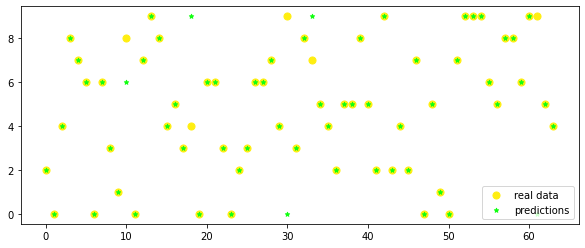

In [29]:
pl.figure(figsize=(10,4))
pl.scatter(range(batch_size),by_test,s=50,
           label='real data',c="#ffee11")
pl.scatter(range(batch_size),
           py_test[:batch_size],
           s=20,marker='*',
           label='predictions',c='#11ff11')
pl.legend();

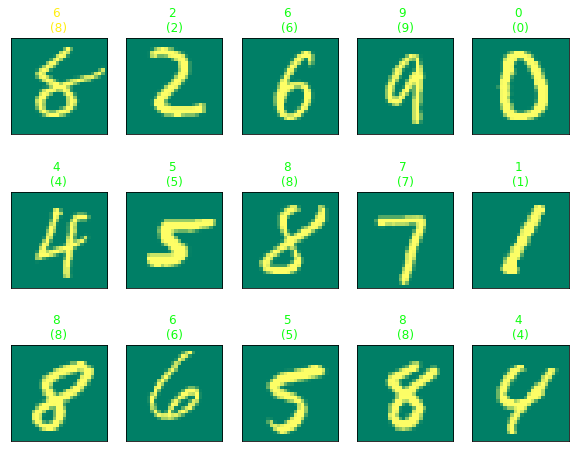

In [28]:
%display_predict 15